In [1]:
library(RColorBrewer)
library (tidyverse)
library (openxlsx)
library(magrittr)  
library(ggrepel)
library (cowplot)
library (readr)
library (ggpubr)
library (eulerr)
library (ComplexHeatmap)

── Attaching packages ────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z.

In [2]:
long = read.table("./data/f_CA2021_inlog_FC15_FC2_evidence-threshold_final.tsv", sep = '\t', row.names =1, header = T)

In [3]:
d = long %>%
dplyr::filter (., howmany_time> 0)
dim (d)

[1] 662 150

In [4]:
str(d, list.len=ncol(d))

'data.frame':	662 obs. of  150 variables:
 $ EtOH_x_04h_R1          : num  6.96 2.92 3.86 2.04 9.46 ...
 $ EtOH_x_04h_R2          : num  7.13 3.52 3.45 1.45 9.5 ...
 $ EtOH_x_04h_R3          : num  6.98 2.6 3.79 1.12 9.17 ...
 $ EtOH_x_08h_R1          : num  7.05 3.09 5.17 2.1 9.19 ...
 $ EtOH_x_08h_R2          : num  7.01 2.89 5.32 2.26 9.22 ...
 $ EtOH_x_08h_R3          : num  7.17 3.3 5.72 1.76 9 ...
 $ EtOH_x_24h_R1          : num  5.83 3.02 6.77 4.29 7.2 ...
 $ EtOH_x_24h_R2          : num  5.62 2.93 6.61 4.15 7.32 ...
 $ EtOH_x_24h_R3          : num  5.8 3.08 7.19 3.85 7.1 ...
 $ V125D3_0.1nM_24h_R1    : num  6.39 3.13 6.29 3.68 7.35 ...
 $ V125D3_0.1nM_24h_R2    : num  6.21 3.34 6.57 3.43 7.39 ...
 $ V125D3_0.1nM_24h_R3    : num  6.38 2.97 6.48 3.84 7.42 ...
 $ V125D3_10nM_04h_R1     : num  6.4 3.52 3.17 1.87 9.41 ...
 $ V125D3_10nM_04h_R2     : num  6.09 2.93 3.25 2.51 9.48 ...
 $ V125D3_10nM_04h_R3     : num  6.35 3.45 3.39 2.39 9.76 ...
 $ V125D3_10nM_08h_R1     : num  5.24 3

In [5]:
Target_V125D3_10nM_04h = d %>%
filter (., Target_V125D3_10nM_04h > 0)
Target_V125D3_10nM_04h = rownames(Target_V125D3_10nM_04h) 
length (Target_V125D3_10nM_04h)

Target_V25D3_1000nM_04h = d %>%
filter (., Target_V25D3_1000nM_04h > 0)
Target_V25D3_1000nM_04h = rownames(Target_V25D3_1000nM_04h) 
length (Target_V25D3_1000nM_04h)

Target_V25D2_1000nM_04h = d %>%
filter (., Target_V25D2_1000nM_04h > 0)
Target_V25D2_1000nM_04h = rownames(Target_V25D2_1000nM_04h) 
length (Target_V25D2_1000nM_04h)

[1] 16

[1] 31

[1] 20

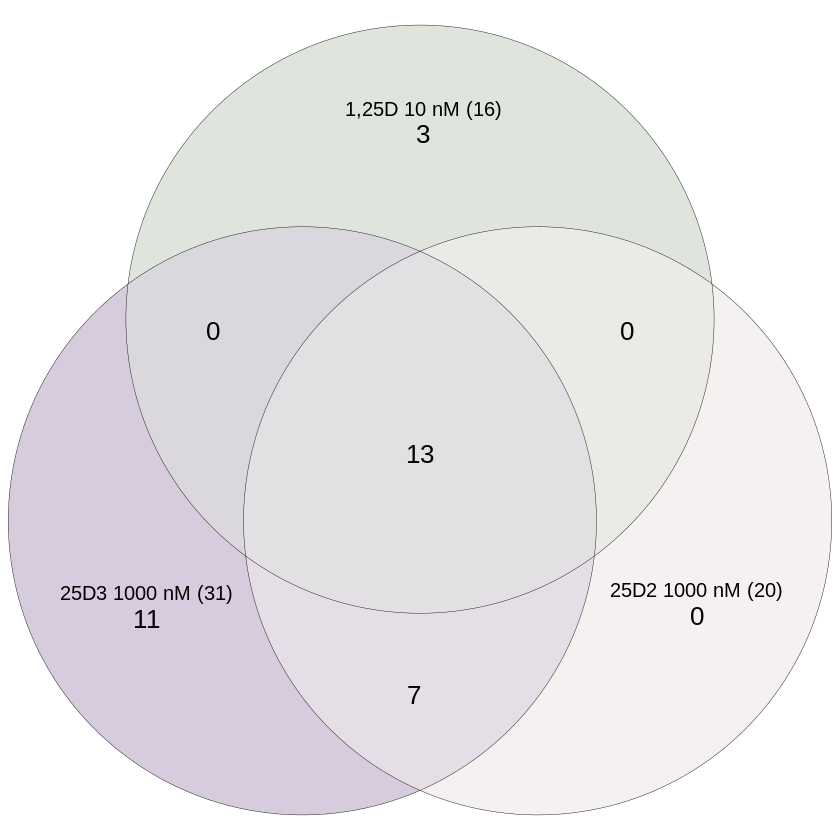

In [6]:
Venn = plot(venn(list(
  "25D3 1000 nM (31)" = Target_V25D3_1000nM_04h,
  "25D2 1000 nM (20)" = Target_V25D2_1000nM_04h,
      "1,25D 10 nM (16)" =  Target_V125D3_10nM_04h
)),

fills = list(fill = c( 
      "#C9BCD3", 
  "#F1ECEB" ,
   "#D5DCD3"
   
),
alpha = 0.77),
labels = list(font = 1, col = "black", cex = 1),
edges = list(lty = 1, lwd =0.33),
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

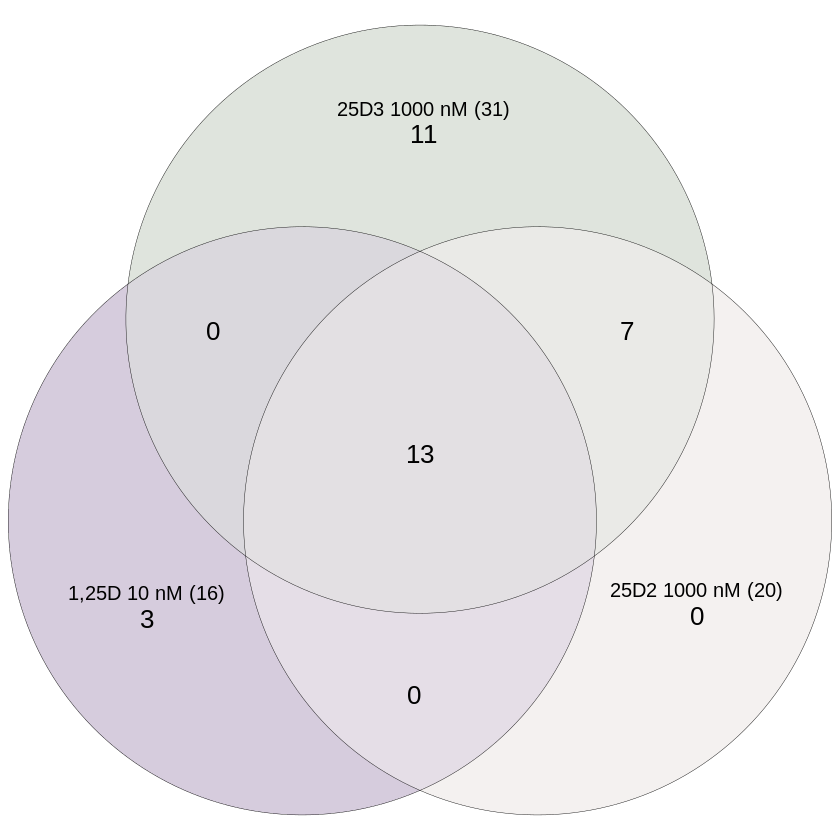

In [7]:
Venn = plot(venn(list(    
 
      "1,25D 10 nM (16)" =  Target_V125D3_10nM_04h,
  "25D2 1000 nM (20)" = Target_V25D2_1000nM_04h,
      "25D3 1000 nM (31)" = Target_V25D3_1000nM_04h
)),

fills = list(fill = c( 
      "#C9BCD3", 
  "#F1ECEB" ,
   "#D5DCD3"
   
),
alpha = 0.77), 
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33), 
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [8]:
#ggsave("./Venn_3x_04h.pdf", 
#       plot = Venn, width = 5, height = 5)

In [9]:
Target_V125D3_10nM_08h = d %>%
filter (., Target_V125D3_10nM_08h > 0)
Target_V125D3_10nM_08h = rownames(Target_V125D3_10nM_08h) 
length (Target_V125D3_10nM_08h)

Target_V25D3_1000nM_08h = d %>%
filter (., Target_V25D3_1000nM_08h > 0)
Target_V25D3_1000nM_08h = rownames(Target_V25D3_1000nM_08h) 
length (Target_V25D3_1000nM_08h)

Target_V25D2_1000nM_08h = d %>%
filter (., Target_V25D2_1000nM_08h > 0)
Target_V25D2_1000nM_08h = rownames(Target_V25D2_1000nM_08h) 
length (Target_V25D2_1000nM_08h)

[1] 134

[1] 130

[1] 117

In [10]:
length (Target_V125D3_10nM_08h)
length (Target_V25D2_1000nM_08h)
length (Target_V25D3_1000nM_08h)

[1] 134

[1] 117

[1] 130

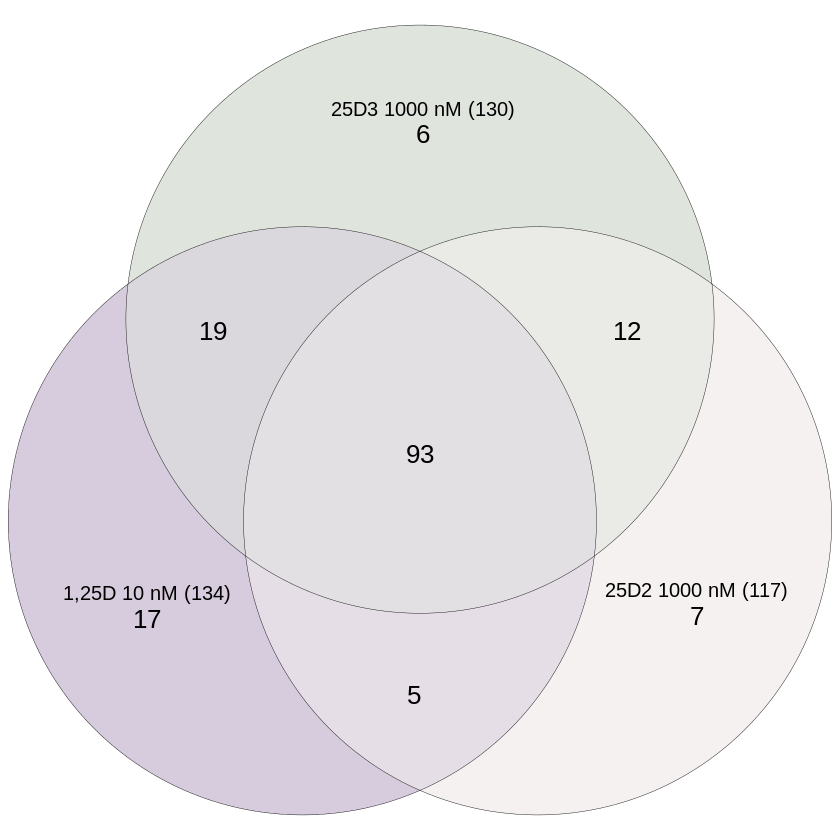

In [11]:
Venn = plot(venn(list(
      "1,25D 10 nM (134)" =  Target_V125D3_10nM_08h,
  "25D2 1000 nM (117)" = Target_V25D2_1000nM_08h,
      "25D3 1000 nM (130)" = Target_V25D3_1000nM_08h
)),

fills = list(fill = c( 
      "#C9BCD3",
  "#F1ECEB" ,
   "#D5DCD3"
   
),
alpha = 0.77), 
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33),
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [16]:
Target_V125D3_10nM_24h = d %>%
filter (., Target_V125D3_10nM_24h > 0)
Target_V125D3_10nM_24h = rownames(Target_V125D3_10nM_24h) 
length (Target_V125D3_10nM_24h)

Target_V25D3_1000nM_24h = d %>%
filter (., Target_V25D3_1000nM_24h > 0)
Target_V25D3_1000nM_24h = rownames(Target_V25D3_1000nM_24h) 
length (Target_V25D3_1000nM_24h)

Target_V25D2_1000nM_24h = d %>%
filter (., Target_V25D2_1000nM_24h > 0)
Target_V25D2_1000nM_24h = rownames(Target_V25D2_1000nM_24h) 
length (Target_V25D2_1000nM_24h)

[1] 254

[1] 293

[1] 299

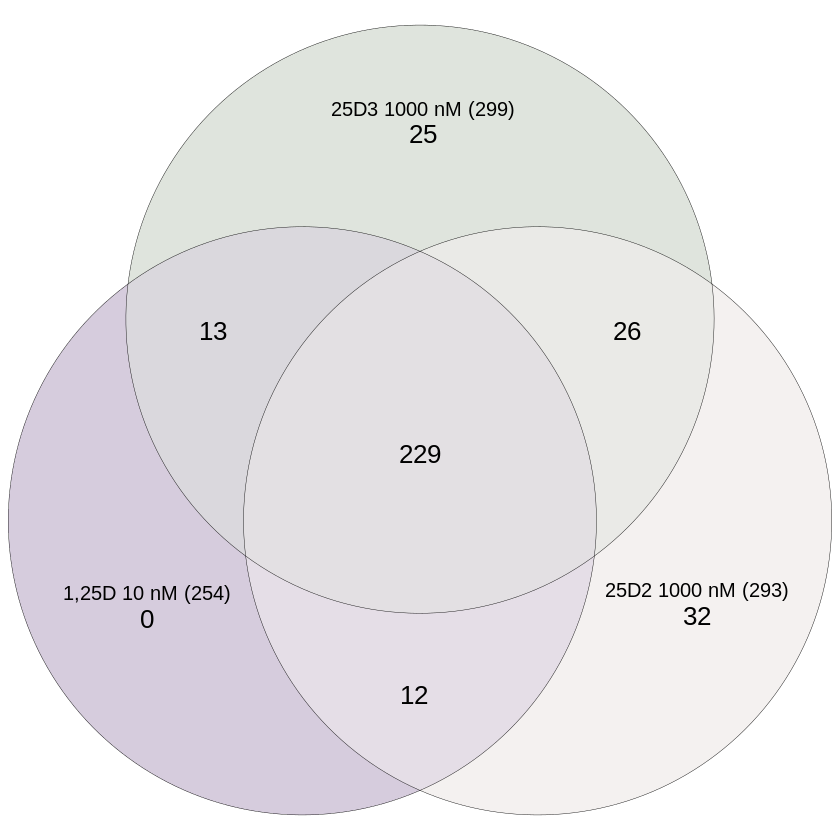

In [17]:
Venn = plot(venn(list(
      "1,25D 10 nM (254)" =  Target_V125D3_10nM_24h,
      "25D2 1000 nM (293)" = Target_V25D2_1000nM_24h,
      "25D3 1000 nM (299)" = Target_V25D3_1000nM_24h
)),

fills = list(fill = c( 
      "#C9BCD3", 
  "#F1ECEB" ,
   "#D5DCD3"
   
),
alpha = 0.77),
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33), #0.15
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [18]:
core04h = list(
 
  "1,25D 10 nM (16)" =  Target_V125D3_10nM_04h,
  "25D3 1000 nM (31)" = Target_V25D3_1000nM_04h,
  "25D2 1000 nM (20)" = Target_V25D2_1000nM_04h
)

m = make_comb_mat(core04h)
comb_size(m)
core04h = extract_comb(m, "111")
length (core04h)

111 011 100 010 
 13   7   3  11

[1] 13

In [19]:
comb_size(m)

111 011 100 010 
 13   7   3  11

In [20]:
#ggsave("./Venn_4x_04h.pdf", 
#       plot = Venn, width = 5, height = 5)

In [21]:
core04h = list(
  "25D2 1000 nM (20)" = Target_V25D2_1000nM_04h,
  "1,25D 10 nM (16)" =  Target_V125D3_10nM_04h,
  "25D3 1000 nM (31)" = Target_V25D3_1000nM_04h
)

m = make_comb_mat(core04h)
comb_size(m)

core04h= extract_comb(m, "111")
length (core04h)
core04h

111 101 010 001 
 13   7   3  11

[1] 13

[1] "ARHGAP22" "ASAP2"    "CD14"     "CLMN"     "ENTPD7"   "G0S2"    
 [7] "HBEGF"    "MYCL"     "PFKFB4"   "PPARGC1B" "SAT1"     "SLC37A2" 
[13] "THEMIS2"

In [22]:
Target_V125D3_10nM_08h = d %>%
filter (., Target_V125D3_10nM_08h > 0)
Target_V125D3_10nM_08h = rownames(Target_V125D3_10nM_08h) 
length (Target_V125D3_10nM_08h)

Target_V25D3_1000nM_08h = d %>%
filter (., Target_V25D3_1000nM_08h > 0)
Target_V25D3_1000nM_08h = rownames(Target_V25D3_1000nM_08h) 
length (Target_V25D3_1000nM_08h)

Target_V25D2_1000nM_08h = d %>%
filter (., Target_V25D2_1000nM_08h > 0)
Target_V25D2_1000nM_08h = rownames(Target_V25D2_1000nM_08h) 
length (Target_V25D2_1000nM_08h)

[1] 134

[1] 130

[1] 117

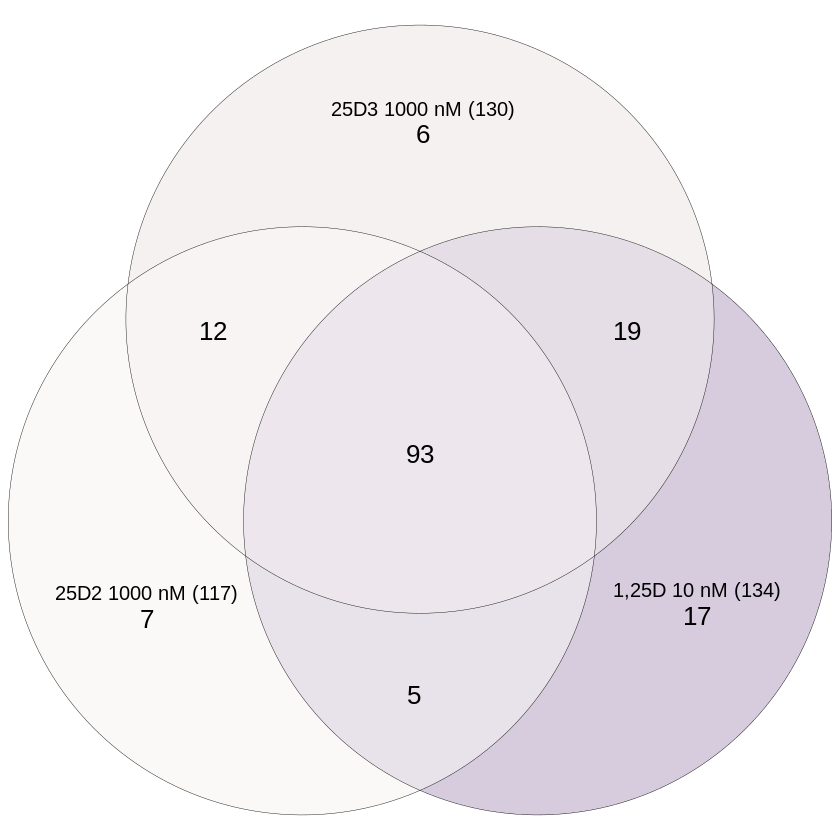

In [23]:
Venn = plot(venn(list(   
   "25D2 1000 nM (117)" = Target_V25D2_1000nM_08h,

      "1,25D 10 nM (134)" =  Target_V125D3_10nM_08h,
     "25D3 1000 nM (130)" = Target_V25D3_1000nM_08h
    
)),

fills = list(fill = c( 
    "#FAF7F6",
      "#C9BCD3",
  "#F1ECEB" 
   
),
alpha = 0.77), 
labels = list(font = 1, col = "black", cex = 1), 
edges = list(lty = 1, lwd =0.33), 
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

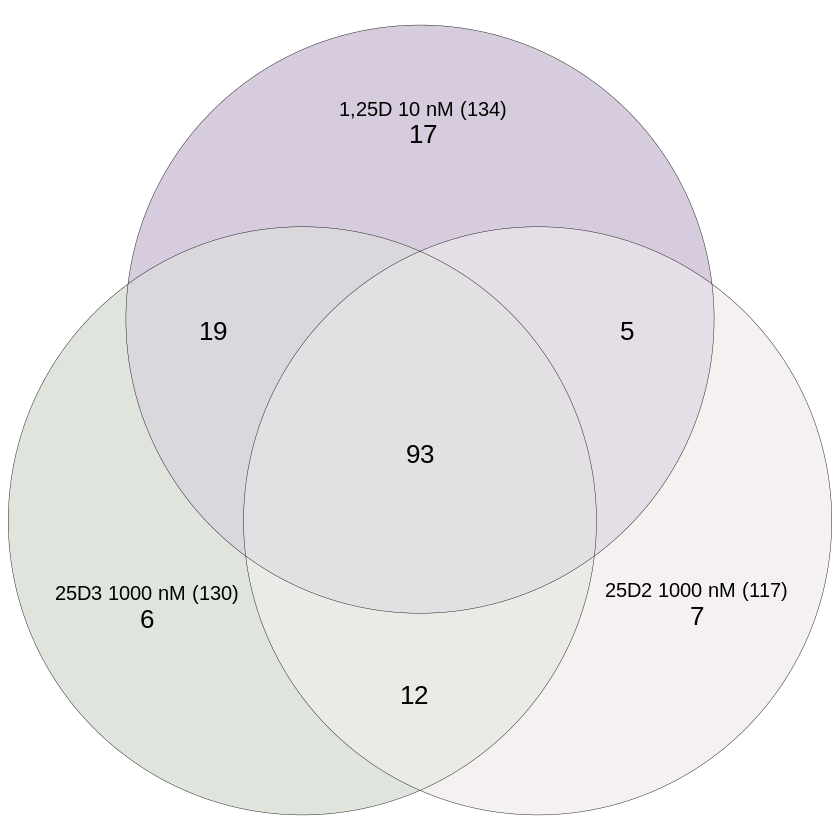

In [24]:
Venn = plot(venn(list(   
      "25D3 1000 nM (130)" = Target_V25D3_1000nM_08h,
       "25D2 1000 nM (117)" = Target_V25D2_1000nM_08h,
        "1,25D 10 nM (134)" =  Target_V125D3_10nM_08h#
)),

fills = list(fill = c( 
"#D5DCD3",
"#F1ECEB" ,
"#C9BCD3"
),
alpha = 0.77), 
labels = list(font = 1, col = "black", cex = 1),
edges = list(lty = 1, lwd =0.33), 
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [25]:
core08h = list(
 "25D2 1000 nM (117)" = Target_V25D2_1000nM_08h,
  "1,25D 10 nM (134)" =  Target_V125D3_10nM_08h,
  "25D3 1000 nM (130)" = Target_V25D3_1000nM_08h
)

m = make_comb_mat(core08h)
comb_size(m)
core08h = extract_comb(m, "111")
length (core08h)

111 110 101 011 100 010 001 
 93   5  12  19   7  17   6

[1] 93

In [26]:
#ggsave("./Venn_4x_08h.pdf", 
#       plot = Venn, width = 7, height = 5)

In [ ]:
Venn = plot(venn(list(
    "core 04 h (13)" = core04h,
  "1,25D 10 nM (134)" =  Target_V125D3_10nM_08h,  
  "25D3 1000 nM (130)" = Target_V25D3_1000nM_08h,
  "25D2 1000 nM (117)" = Target_V25D2_1000nM_08h
)),

fills = list(fill = c( 
#    "blue",
    "#FAF7F6",
"#C9BCD3",
  "#F1ECEB" ,
   "#D5DCD3"
   
),
alpha = 0.77), #"#F1F9FF", "#FBF1EA"FAF3F0
labels = list(font = 1, col = "black", cex = 1), ##CD003D
edges = list(lty = 1, lwd =0.33), #0.15
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

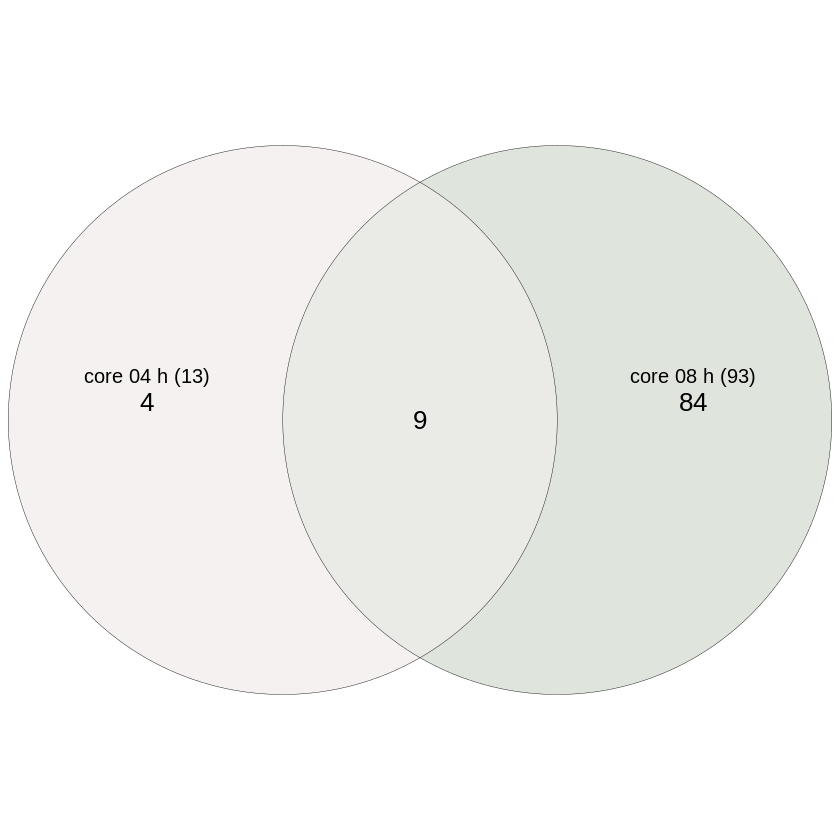

In [28]:
Venn = plot(venn(list(
    "core 04 h (13)" = core04h,
    "core 08 h (93)" = core08h#,  
    )),

fills = list(fill = c( 
  "#F1ECEB" ,#lightgreen,
   "#D5DCD3"#, #green
   
),
alpha = 0.77), 
labels = list(font = 1, col = "black", cex = 1), ##CD003D
edges = list(lty = 1, lwd =0.33), #0.15
mar = c(5, 5, 5, 5),
key = TRUE, counts = TRUE, quantities = list (type = c("counts"),cex = 1.3))
Venn

In [29]:
common = list(
    "core 04 h (13)" = core04h,
    "core 08 h (10)" = core08h#,
)

m = make_comb_mat(common)
comb_size(m)
common = extract_comb(m, "11")
length (common)

11 10 01 
 9  4 84

[1] 9

In [30]:
common

[1] "ASAP2"   "CD14"    "CLMN"    "ENTPD7"  "G0S2"    "HBEGF"   "PFKFB4" 
[8] "SAT1"    "SLC37A2"

In [31]:
outgroup_left = list(
    "core 04 h (13)" = core04h,
    "core 08 h (10)" = core08h#,
)

m = make_comb_mat(outgroup_left)
comb_size(m)
outgroup_left = extract_comb(m, "10")
length (outgroup_left)

11 10 01 
 9  4 84

[1] 4

In [32]:
outgroup_left

[1] "ARHGAP22" "MYCL"     "PPARGC1B" "THEMIS2"

In [33]:
common = list(
    "core 04 h (13)" = core04h,
    "core 08 h (10)" = core08h#,
)

m = make_comb_mat(common)
comb_size(m)
common = extract_comb(m, "10")
length (common)

11 10 01 
 9  4 84

[1] 4

In [34]:
common

[1] "ARHGAP22" "MYCL"     "PPARGC1B" "THEMIS2"

In [35]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /research/users/andreha/miniconda3/envs/Mamba-14/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ComplexHeatmap_2.10.0 eulerr_6.1.1          ggpubr_0.4.0         
 [4] cowplot_1.1.1         ggrepel_0.9.1         magrittr_2.0.1       
 [7] openxlsx_4.2.5        forcats_0.5.1         stringr_1.4.0        
[10] dplyr_1.0.7           purrr_0.3.4           r